In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import *
from collections import Counter
%matplotlib inline

In [2]:
stats.f.sf(3.5, 3, 16)

0.040052541494826094

In [3]:
import pandas as pd
import scipy.stats as stats
URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]
stats.f_oneway(A, B, C, D)
stats.f_

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [ ]:
type(data.groupby('Therapy')['expr'])

## Применение регрессионного анализа и интерпретация результатов

In [2]:
data = pd.read_csv("http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv")
data.shape

(51, 6)

In [5]:
data.head(3)

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,72.249020,15.275894,38.2,60.80,71.6,86.80,100.0
white,51.0,81.719608,13.897223,25.9,76.80,85.4,90.25,97.1
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.70,92.1
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.40,18.0
female_house,51.0,11.633333,2.356155,7.8,9.55,11.8,12.65,18.9


In [7]:
data.corr()

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


In [8]:
lr = stats.linregress(data.hs_grad, data.poverty)
print(lr)

LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928)


In [ ]:
lr2 = stats.linregress(data.white, data.poverty)
print(lr2)

In [ ]:
data.plot.scatter(x='hs_grad', y='poverty', figsize=(10,5), label='Распределение многомерное дискретное')
plt.plot(data.hs_grad, [lr.slope*x+lr.intercept for x in data.hs_grad] , '-r', label='Тренд' )
plt.title("Visualization", fontdict={'fontsize': 20})
plt.xticks(range(77,93))
plt.legend()
plt.show()

### InPlotly

In [ ]:
# Стандартное импортирование plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
 
# Использование cufflinks в офлайн-режиме
import cufflinks
cufflinks.go_offline()
 
# Настройка глобальной темы cufflinks
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [ ]:
data.iplot(x='hs_grad', y='poverty', mode='markers', 
            xTitle='Процент людей со средним образованием',
            yTitle='Уровень бедности',
            title='Влияние образование на уровень бедности',
            size=[int(x) for x in data.female_house])

In [ ]:
test = data[data.hs_grad<80]
test

In [ ]:
lrt = stats.linregress(test.hs_grad, test.poverty)
lrt

In [ ]:
test.plot.scatter(x='hs_grad', y='poverty')
plt.show()

### Множественная линейная регрессия

In [13]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='poverty ~ hs_grad + metro_res + white + female_house', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           8.88e-10
Time:                        23:28:12   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Draft

In [ ]:
a = np.random.rand(2,5)
a

In [ ]:
a = np.array([[1,2],[5,6]])
a[0][1]

In [ ]:
q=np.ndarray((2,5))
q

In [ ]:
q[0:1]

In [ ]:
test.drop(labels='state', axis=1)

In [ ]:
test

In [ ]:
test.info()

In [89]:
poisson = stats.poisson(3)
res = 1
for x in range(5):
    res -= poisson.pmf(x)
print(res)

0.1847367554762279


In [93]:
bi = stats.binom(15, 0.1)
var = bi.rvs(20)
data = pd.DataFrame(var, columns=['bar'])
print(Counter(var))
print(Counter(var).keys())
print(Counter(var).values())
print(np.bincount(var))

Counter({2: 8, 1: 8, 3: 2, 4: 1, 0: 1})
dict_keys([2, 4, 1, 3, 0])
dict_values([8, 1, 8, 2, 1])
[1 8 8 2 1]


Text(0.5,1,'kek')

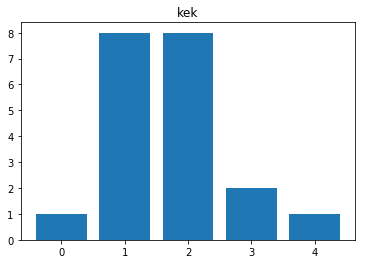

In [94]:
pylab.bar(Counter(var).keys(), Counter(var).values(), align = 'center')
pylab.title('kek')

In [ ]:
data.plot(kind='hist')
plt.show()

In [ ]:
norm = stats.norm(0, 1)
norm.ppf(0.975)

In [ ]:
np.ceil((norm.ppf(0.975)/0.1)**2)

### Построение доверительных интервалов для среднего

In [ ]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [ ]:
_zconfint_generic(0, 1/10, 0.05, 'two-sided')

In [ ]:
_tconfint_generic(0, 1/10, 100 - 1, 0.05, 'two-sided')

In [ ]:
[*zip([1,1,1],[0,0,0])]

In [ ]:
from statsmodels.stats.proportion import proportion_confint

In [ ]:
proportion_confint(70, 500, 0.01, method='wilson'), proportion_confint(119, 600, 0.01, method='wilson')

In [ ]:
def proportions_confint_diff_ind(a1, n1, a2, n2, alpha = 0.02):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = a1/n1
    p2 = a2/n2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

In [ ]:
proportions_confint_diff_ind(70,500,112,600)

In [ ]:
a = np.array([140,120,160,110,150,120,130,170])
a.mean()

In [ ]:
_tconfint_generic(a.mean(), a.std(ddof=1)/sqrt(len(a)), len(a)-1, 0.05, 'two-sided')

In [ ]:
np.arange(0,5,2)

In [ ]:
stats.binom_test(5, 10, alternative='greater')

In [13]:
res = []
for q in range(1,37):
    for w in range(1,37):
        for a in range(1,37):
            if q*w*a == 36:
                res.append([q,w,a, sum([q,w,a])])
data = pd.DataFrame(res, columns=['A','B', 'C', 'sum'])
data.sort_values('sum')

,A,B,C,sum
17,3,3,4,10
22,4,3,3,10
18,3,4,3,10
26,6,3,2,11
25,6,2,3,11
19,3,6,2,11
12,2,6,3,11
11,2,3,6,11
16,3,2,6,11
10,2,2,9,13


In [11]:
data[(data.A==data.B) & (data.C>data.A) & (data.C>data.B)]

,A,B,C,sum
0,1,1,36,38
10,2,2,9,13
17,3,3,4,10


In [ ]:
a = stats.norm()